In [85]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image, ImageOps
import scipy
import matplotlib

(128, 128)


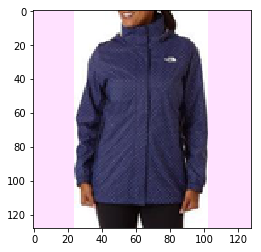

In [2]:
desired_size = 128

im_pth = '/home/team12/team12/data/gear_images/hardshell_jackets/896903.jpeg'

def process_image(old_im_pth,new_im_path):
   im = Image.open(old_im_pth)
   old_size = im.size  

   ratio = float(desired_size)/max(old_size)
   new_size = tuple([int(x*ratio) for x in old_size])
   
   im = im.resize(new_size, Image.ANTIALIAS)
   
   new_im = Image.new("RGB", (desired_size, desired_size), (255, 225, 255))
   new_im.paste(im, ((desired_size-new_size[0])//2,
                     (desired_size-new_size[1])//2))
   print(new_im.size)
   plt.imshow(new_im)
   #new_im.save(new_im_path, "JPEG")

process_image(im_pth, '')

[[[159 223 222]
  [159 223 222]
  [159 223 222]
  ...
  [155 214 222]
  [155 214 223]
  [155 214 222]]

 [[109 206 204]
  [109 206 204]
  [109 206 204]
  ...
  [104 192 203]
  [103 192 204]
  [103 191 204]]

 [[114 209 205]
  [114 209 205]
  [114 209 206]
  ...
  [110 195 205]
  [110 194 206]
  [109 194 206]]

 ...

 [[ 87 161 215]
  [ 87 161 215]
  [ 87 160 215]
  ...
  [ 84 145 215]
  [ 85 147 215]
  [ 86 149 214]]

 [[ 82 153 214]
  [ 80 151 214]
  [ 80 152 214]
  ...
  [ 74 139 215]
  [ 75 139 214]
  [ 78 140 215]]

 [[ 73 144 216]
  [ 72 144 216]
  [ 75 147 215]
  ...
  [ 70 138 216]
  [ 72 139 215]
  [ 74 139 215]]]


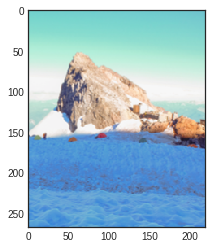

[[[152.57322176 225.19480519 221.59388646]
  [152.57322176 225.19480519 221.59388646]
  [152.57322176 225.19480519 221.59388646]
  ...
  [148.30543933 215.25974026 221.59388646]
  [148.30543933 215.25974026 222.70742358]
  [148.30543933 215.25974026 221.59388646]]

 [[ 99.22594142 206.42857143 201.55021834]
  [ 99.22594142 206.42857143 201.55021834]
  [ 99.22594142 206.42857143 201.55021834]
  ...
  [ 93.89121339 190.97402597 200.43668122]
  [ 92.82426778 190.97402597 201.55021834]
  [ 92.82426778 189.87012987 201.55021834]]

 [[104.56066946 209.74025974 202.66375546]
  [104.56066946 209.74025974 202.66375546]
  [104.56066946 209.74025974 203.77729258]
  ...
  [100.29288703 194.28571429 202.66375546]
  [100.29288703 193.18181818 203.77729258]
  [ 99.22594142 193.18181818 203.77729258]]

 ...

 [[ 75.75313808 156.75324675 213.79912664]
  [ 75.75313808 156.75324675 213.79912664]
  [ 75.75313808 155.64935065 213.79912664]
  ...
  [ 72.55230126 139.09090909 213.79912664]
  [ 73.61924686 14

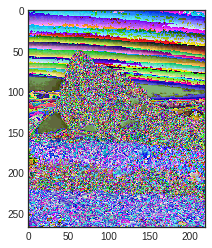

[[[152 225 221]
  [152 225 221]
  [152 225 221]
  ...
  [148 215 221]
  [148 215 222]
  [148 215 221]]

 [[ 99 206 201]
  [ 99 206 201]
  [ 99 206 201]
  ...
  [ 93 190 200]
  [ 92 190 201]
  [ 92 189 201]]

 [[104 209 202]
  [104 209 202]
  [104 209 203]
  ...
  [100 194 202]
  [100 193 203]
  [ 99 193 203]]

 ...

 [[ 75 156 213]
  [ 75 156 213]
  [ 75 155 213]
  ...
  [ 72 139 213]
  [ 73 141 213]
  [ 74 143 212]]

 [[ 70 147 212]
  [ 68 145 212]
  [ 68 146 212]
  ...
  [ 61 132 213]
  [ 62 132 212]
  [ 66 133 213]]

 [[ 60 137 214]
  [ 59 137 214]
  [ 62 141 213]
  ...
  [ 57 131 214]
  [ 59 132 213]
  [ 61 132 213]]]


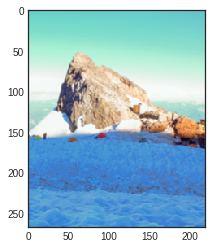

In [114]:
def normalize(arr):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    return arr

#im_pth = '/home/team12/team12/data/gear_images/hardshell_jackets/896903.jpeg'
im_pth = '/home/team12/team12/data/screen_shot_2018-05-23_at_1.49.13_pm.png'
img=Image.open(im_pth).convert('RGB')
print(np.array(img))
#img=mpimg.imread(im_pth)
plt.imshow(img)
plt.show()

img = np.array(img)
new_img=normalize(img)
print(np.array(new_img))
plt.imshow(new_img)
plt.show()

new_img2=Image.fromarray(new_img.astype('uint8'),'RGB')
print(np.array(new_img2))

#new_img2=Image.fromarray(new_img.astype('uint8'))
#new_img2=Image.fromarray(normalize(img).astype('uint8')).convert('RGB')
#new_img2=Image.fromarray(normalize(img).astype('uint8')).convert('RGB')
plt.imshow(new_img2)
plt.show()

#new_img2.save("/tmp/test.png")
matplotlib.image.imsave('/tmp/test2.bmp', new_img.astype('uint8'))


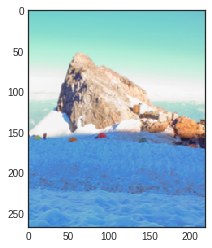

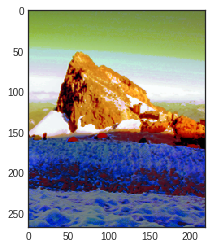

AttributeError: 'Image' object has no attribute 'astype'

In [49]:
#im_pth = '/home/team12/team12/data/gear_images/hardshell_jackets/896903.jpeg'
im_pth = '/home/team12/team12/data/screen_shot_2018-05-23_at_1.49.13_pm.png'
#img=mpimg.imread(im_pth)
img = Image.open(im_pth).convert('RGB')
plt.imshow(img)
plt.show()

new_img=ImageOps.equalize(img)
plt.imshow(new_img)
plt.show()

print(img == new_img.astype('int'))

(128, 128, 3)


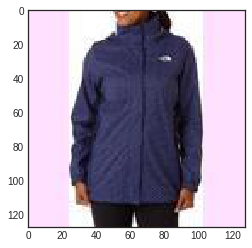

(array([6.3000e+01, 1.7000e+01, 2.4000e+01, 2.3000e+01, 2.7000e+01,
        3.1000e+01, 3.7000e+01, 5.9000e+01, 5.7000e+01, 5.5000e+01,
        6.7000e+01, 8.6000e+01, 7.5000e+01, 1.1100e+02, 9.6000e+01,
        1.0900e+02, 1.5300e+02, 1.5200e+02, 1.7200e+02, 1.5900e+02,
        1.6600e+02, 1.9200e+02, 1.7900e+02, 1.6400e+02, 1.9500e+02,
        1.8900e+02, 2.0000e+02, 2.0600e+02, 1.9300e+02, 1.7500e+02,
        1.6200e+02, 1.8600e+02, 1.8100e+02, 1.8800e+02, 2.0300e+02,
        1.8100e+02, 2.2600e+02, 2.4200e+02, 2.5000e+02, 2.6300e+02,
        3.1800e+02, 2.7500e+02, 3.1600e+02, 3.2700e+02, 3.6100e+02,
        4.2500e+02, 4.4000e+02, 4.3500e+02, 4.5700e+02, 4.7800e+02,
        4.7000e+02, 4.9800e+02, 5.1800e+02, 5.3600e+02, 4.8200e+02,
        5.0600e+02, 4.7200e+02, 5.2300e+02, 4.6500e+02, 4.6400e+02,
        4.8700e+02, 4.6400e+02, 4.2600e+02, 3.4800e+02, 3.5400e+02,
        3.0800e+02, 3.2400e+02, 2.8600e+02, 2.3900e+02, 2.3600e+02,
        1.9800e+02, 2.0000e+02, 2.0700e+02, 1.66

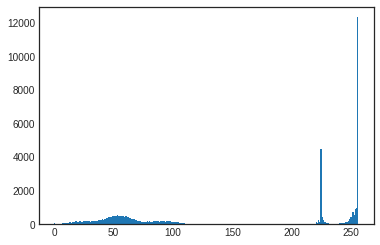

In [35]:
plt.style.use('seaborn-white')

im_pth = '/home/team12/team12/data/gear_images/hardshell_jackets/step2a/896903.jpeg'
img=mpimg.imread(im_pth)
size=img.shape
plt.imshow(img)
print(img.shape)
#print(img.reshape(size[0], -1).shape)
#print(img.ravel().shape)
#print(np.squeeze(img, axis=2).shape)
plt.show()
#plt.hist(img[:, :, 0].reshape(size[0], -1))
plt.hist(img.ravel(), 256, [0, 256])
#plt.hist(img.reshape(size[0], -1))
#data = img.ravel()


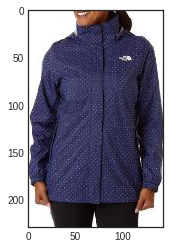

(array([2.6100e+02, 6.5000e+01, 8.4000e+01, 1.0700e+02, 1.3400e+02,
        1.5400e+02, 1.6300e+02, 2.1200e+02, 2.5100e+02, 2.9100e+02,
        3.1000e+02, 3.4600e+02, 3.5200e+02, 3.4600e+02, 3.6200e+02,
        4.0200e+02, 4.7200e+02, 4.5300e+02, 4.8900e+02, 6.2200e+02,
        6.6400e+02, 8.0200e+02, 7.6000e+02, 6.0100e+02, 6.6300e+02,
        6.6900e+02, 7.4000e+02, 7.5000e+02, 6.0500e+02, 6.3000e+02,
        6.4800e+02, 6.4800e+02, 6.5100e+02, 6.8200e+02, 7.0500e+02,
        7.3200e+02, 7.4500e+02, 8.2700e+02, 8.7100e+02, 9.6200e+02,
        1.0200e+03, 1.0610e+03, 1.1620e+03, 1.1580e+03, 1.3130e+03,
        1.2730e+03, 1.3280e+03, 1.3780e+03, 1.3900e+03, 1.3840e+03,
        1.4440e+03, 1.4110e+03, 1.4130e+03, 1.3850e+03, 1.2980e+03,
        1.3280e+03, 1.3540e+03, 1.3260e+03, 1.3190e+03, 1.1990e+03,
        1.1520e+03, 1.1010e+03, 1.0780e+03, 1.0460e+03, 9.4400e+02,
        8.9500e+02, 8.2500e+02, 8.3400e+02, 7.8400e+02, 7.9200e+02,
        7.4900e+02, 6.7800e+02, 6.8100e+02, 6.78

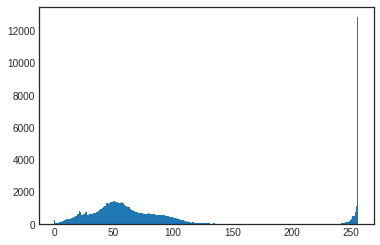

In [36]:
plt.style.use('seaborn-white')

im_pth = '/home/team12/team12/data/gear_images/hardshell_jackets/896903.jpeg'
img=mpimg.imread(im_pth)
size=img.shape
plt.imshow(img)
plt.show()
plt.hist(img.ravel(), 256, [0, 256])


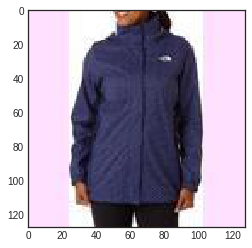

(array([6.3000e+01, 1.7000e+01, 2.4000e+01, 2.3000e+01, 2.7000e+01,
        3.1000e+01, 3.7000e+01, 5.9000e+01, 5.7000e+01, 5.5000e+01,
        6.7000e+01, 8.6000e+01, 7.5000e+01, 1.1100e+02, 9.6000e+01,
        1.0900e+02, 1.5300e+02, 1.5200e+02, 1.7200e+02, 1.5900e+02,
        1.6600e+02, 1.9200e+02, 1.7900e+02, 1.6400e+02, 1.9500e+02,
        1.8900e+02, 2.0000e+02, 2.0600e+02, 1.9300e+02, 1.7500e+02,
        1.6200e+02, 1.8600e+02, 1.8100e+02, 1.8800e+02, 2.0300e+02,
        1.8100e+02, 2.2600e+02, 2.4200e+02, 2.5000e+02, 2.6300e+02,
        3.1800e+02, 2.7500e+02, 3.1600e+02, 3.2700e+02, 3.6100e+02,
        4.2500e+02, 4.4000e+02, 4.3500e+02, 4.5700e+02, 4.7800e+02,
        4.7000e+02, 4.9800e+02, 5.1800e+02, 5.3600e+02, 4.8200e+02,
        5.0600e+02, 4.7200e+02, 5.2300e+02, 4.6500e+02, 4.6400e+02,
        4.8700e+02, 4.6400e+02, 4.2600e+02, 3.4800e+02, 3.5400e+02,
        3.0800e+02, 3.2400e+02, 2.8600e+02, 2.3900e+02, 2.3600e+02,
        1.9800e+02, 2.0000e+02, 2.0700e+02, 1.66

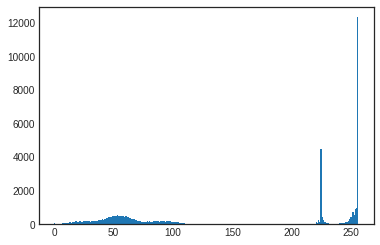

In [37]:
plt.style.use('seaborn-white')

im_pth = '/home/team12/team12/data/gear_images/hardshell_jackets/step2a/896903.jpeg'
img=mpimg.imread(im_pth)
size=img.shape
plt.imshow(img)
plt.show()
plt.hist(img.ravel(), 256, [0, 256])

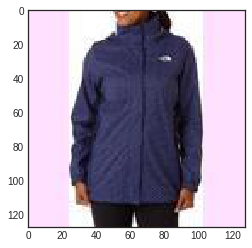

(array([6.3000e+01, 1.7000e+01, 2.4000e+01, 2.3000e+01, 2.7000e+01,
        3.1000e+01, 3.7000e+01, 5.9000e+01, 5.7000e+01, 5.5000e+01,
        6.7000e+01, 8.6000e+01, 7.5000e+01, 1.1100e+02, 9.6000e+01,
        1.0900e+02, 1.5300e+02, 1.5200e+02, 1.7200e+02, 1.5900e+02,
        1.6600e+02, 1.9200e+02, 1.7900e+02, 1.6400e+02, 1.9500e+02,
        1.8900e+02, 2.0000e+02, 2.0600e+02, 1.9300e+02, 1.7500e+02,
        1.6200e+02, 1.8600e+02, 1.8100e+02, 1.8800e+02, 2.0300e+02,
        1.8100e+02, 2.2600e+02, 2.4200e+02, 2.5000e+02, 2.6300e+02,
        3.1800e+02, 2.7500e+02, 3.1600e+02, 3.2700e+02, 3.6100e+02,
        4.2500e+02, 4.4000e+02, 4.3500e+02, 4.5700e+02, 4.7800e+02,
        4.7000e+02, 4.9800e+02, 5.1800e+02, 5.3600e+02, 4.8200e+02,
        5.0600e+02, 4.7200e+02, 5.2300e+02, 4.6500e+02, 4.6400e+02,
        4.8700e+02, 4.6400e+02, 4.2600e+02, 3.4800e+02, 3.5400e+02,
        3.0800e+02, 3.2400e+02, 2.8600e+02, 2.3900e+02, 2.3600e+02,
        1.9800e+02, 2.0000e+02, 2.0700e+02, 1.66

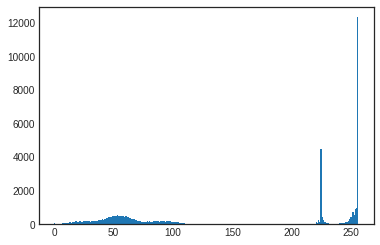

In [38]:
plt.style.use('seaborn-white')

im_pth = '/home/team12/team12/data/gear_images/hardshell_jackets/step2b/896903.jpeg'
img=mpimg.imread(im_pth)
size=img.shape
plt.imshow(img)
plt.show()
plt.hist(img.ravel(), 256, [0, 256])

In [ ]:
plt.imshow(img)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
import numpy as np
import os
from os import listdir
from os.path import isfile, join

def process_image(old_im_pth,new_im_path):
   im = Image.open(old_im_pth)
   old_size = im.size  

   ratio = float(desired_size)/max(old_size)
   new_size = tuple([int(x*ratio) for x in old_size])
   
   im = im.resize(new_size, Image.ANTIALIAS)
   
   new_im = Image.new("RGB", (desired_size, desired_size), (255, 225, 255))
   new_im.paste(im, ((desired_size-new_size[0])//2,
                     (desired_size-new_size[1])//2))
   new_im.save(new_im_path, "JPEG")

img_root = '/home/team12/team12/data/gear_images'
img_dirs = [os.path.join(img_root, o) for o in os.listdir(img_root) if os.path.isdir(os.path.join(img_root,o))]
for img_dir in img_dirs:
    img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f))]
    for img_file in img_files:
        img_full_path = img_dir + '/' + img_file
        #img=mpimg.imread(img_full_path)
        new_dir = img_dir.replace('gear_images', 'gear_images_normalized')
        print(new_dir)
        if not os.path.exists(new_dir):
            os.makedirs(new_dir)